In [119]:
"""
Created on Thur Sep  14 00:25:54 2023
@author: Fernandez, Maria Giselle
"""

'\nCreated on Sun Apr  9 00:25:54 2023\n@author: Fernandez, Maria Giselle\n'

In [120]:
# Required Libraries: Import the libraries essential for plotting and numerical operations.
import matplotlib.pyplot as plt
import numpy as np

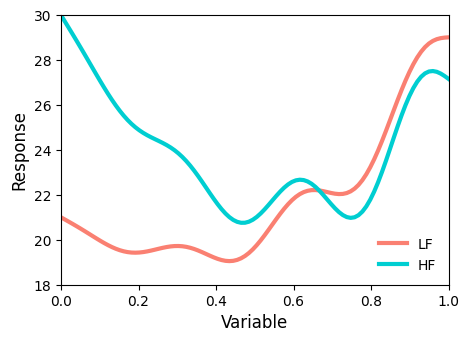

In [434]:
''' The multi-fidelity Forrester function is commonly used as a toy problem in studies of surrogate modeling and multi-fidelity analysis. 
It consists of a high-fidelity and a low-fidelity function, generally denoted as fHF(x) and fLF(x), respectively.

The Forrester function f(x) is often defined as:
f(x)=(6x−2)2sin⁡(12x−4)

For the multi-fidelity setting, a low-fidelity approximation fLF(x) is usually created by adding some bias and noise to the high-fidelity 
function f(x). 

fLF​(x)=0.5f(x)+10(x−0.5)−5 '''

# Define the High-Fidelity function (HF)
def func_HF(x):
    return (6*x - 2)**2 * np.sin(12*x - 4)

# Define the Low-Fidelity function (LF)
def func_LF(x):
    return 0.5 * func_HF(x) + 10 * (x - 0.5) - 5

# Lower and upper bounds for function evaluations
lb = 0
ub = 1

# Generate an array of 100 points, linearly spaced between the lower and upper bounds
x = np.linspace(lb, ub, 100)

# Evaluate the High-Fidelity function (HF) at these points
fHF = func_HF(x)

# Evaluate the Low-Fidelity function (LF) at these points
fLF = func_LF(x)

# Initialize the figure for plotting
plt.figure(figsize=[5, 3.5])

# Plot the Low-Fidelity function (LF)
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')

# Plot the High-Fidelity function (HF)
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Configure plot parameters
plt.xlim([0, 1])
plt.ylim([18, 30])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Save the plot as a high-resolution PNG file
plt.savefig('Functions.png', dpi=1000, bbox_inches='tight', transparent=True)


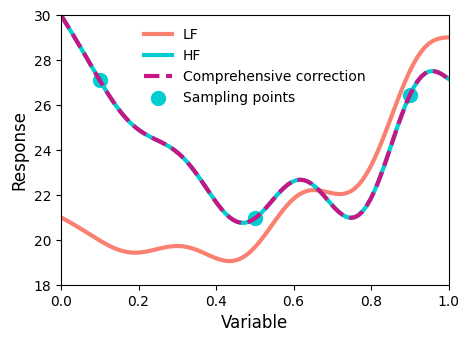

In [436]:
''' func_X(x): Expands the input x into a design matrix X comprising the LF model, x, and x2.
    func_coef(X, Y, W): Computes the model coefficients using weighted least squares.
    func_comprehensive(x, x_sampHF): Forms a comprehensive model that refines the LF model based on HF data at sampled points.
    Plotting: Visualizes LF, HF, and the comprehensive model, along with HF sampling points.
    '''

# Previously defined HF and LF functions would be here

# Define the composite function to expand feature space (X)
def func_X(x):
    return np.array([func_LF(x), x, x**2]).T

# Calculate coefficients for the comprehensive model based on least squares
# X: design matrix, Y: response vector, W: weight matrix
def func_coef(X, Y, W=np.diag(np.ones(len(X)))):
    return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

# Define the comprehensive function to produce a correction over LF model
# x: input variable array, x_sampHF: HF sample points
def func_comprehensive(x, x_sampHF):
    X = func_X(x)  # Obtain composite features
    Y = func_HF(x_sampHF)  # Obtain HF function values at sample points
    B = func_coef(func_X(x_sampHF), Y)  # Coefficients for comprehensive model
    return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

# Plotting starts here
# Define points sampled for HF function
x_sampHF = np.array([0.1, 0.5, 0.9])

# Initialize the figure
plt.figure(figsize=[5, 3.5])

# Plot LF and HF models
plt.plot(x, fLF, c='salmon', linewidth=3, label='LF')
plt.plot(x, fHF, c='darkturquoise', linewidth=3, label='HF')

# Plot the comprehensive model
plt.plot(x_sampLF, func_comprehensive(x_sampLF, x_sampHF), '--', c='mediumvioletred', linewidth=3, label='Comprehensive correction')

# Plot the HF sample points
plt.scatter(x_sampHF, func_HF(x_sampHF), 100, c='darkturquoise', label='Sampling points')

# Configure plot parameters
plt.xlim([0, 1])
plt.ylim([18, 30])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Save the plot
plt.savefig('Comprehensive.png', dpi=1000, bbox_inches='tight', transparent=True)


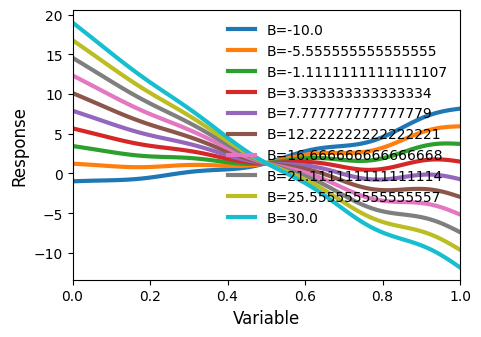

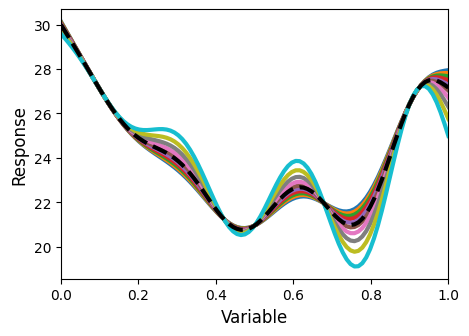

In [440]:

''' func_HF(x): Represents a high-fidelity (HF) function, defined mathematically.
    func_LF(x, B): Represents a low-fidelity (LF) function with coefficients A and C and a variable parameter B.
    func_X(x, B): Generates an array incorporating the LF function, x, and x2.
    func_coef(X, Y, W): Computes coefficients for a linear combination of basis functions using weighted least squares.
    func_comprehensive(x, x_sampHF, A): Computes a comprehensive function incorporating LF, HF, and coefficients.
'''

# Define the High-Fidelity function (HF)
def func_HF(x):
    return 2*x*np.sin(20*x+2) + 10*np.exp(x) + 20*(x-1)**2

# Define the Low-Fidelity function (LF)
def func_LF(x,B):
    A = 0.7
    C = 5
    return A*func_HF(x) + B*(x-0.5) + C

# Define the composite function (X)
def func_X(x,B):
    return np.array([func_LF(x,B), x, x**2]).T

# Define the function to compute coefficients
def func_coef(X,Y,W=np.diag(np.ones(len(X)))):
    return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

# Define the comprehensive function
def func_comprehensive(x, x_sampHF,B):
    X = func_X(x,B)
    Y = func_HF(x_sampHF)
    B = func_coef(func_X(x_sampHF,A),Y)
    return ((B[0])*X[:,0] + X[:,1:].dot(B[1:].reshape(-1,1)).T)[0]

# Sample points for HF
x_sampHF = np.array([0.1,0.5,0.9])

# Generate the first plot
plt.figure(figsize=[5,3.5])
x = np.linspace(0, 1, 100) # You might need to define 'x' in the original code
for A in np.linspace(-10,30,10):
    plt.plot(x,func_HF(x)-func_LF(x,A),linewidth=3,label=f'B={A}')
plt.xlim([0,1])
plt.legend(frameon=False)
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Response',fontsize=12)

# Generate the second plot
plt.figure(figsize=[5,3.5])
for A in np.linspace(-10,30,10):
    plt.plot(x,func_comprehensive(x, x_sampHF,A),linewidth=3,label=f'B={A}')
plt.plot(x,func_HF(x),'k--',linewidth=3,label='HF')
plt.xlim([0,1])
plt.xlabel('Variable',fontsize=12)
plt.ylabel('Response',fontsize=12)
plt.savefig('A.png', dpi=1000, bbox_inches='tight', transparent=True)


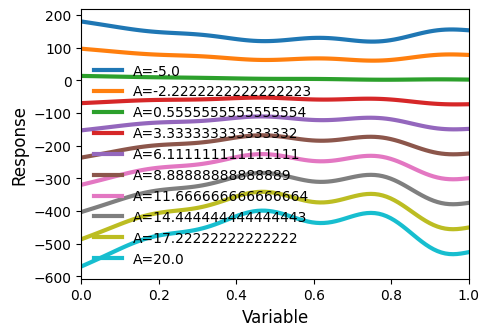

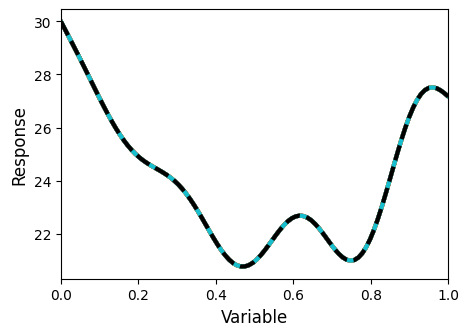

In [438]:
''' func_HF(x): Represents the High-Fidelity (HF) model.
    func_LF(x, A): Represents the Low-Fidelity (LF) model with tunable parameter AA.
    func_X(x, A): Creates the design matrix XX, including the LF model, xx, and x2x2.
    func_coef(X, Y, W): Calculates coefficients BB using weighted least squares.
    func_comprehensive(x, x_sampHF, A): Constructs a comprehensive model combining LF and HF data.
    Two plots are created:
    The first shows the difference between HF and LF models for different values of AA.
    The second plot visualizes the comprehensive model alongside the HF model for various A values.

The comprehensive model aims to offer a middle-ground solution, balancing computational efficiency against model fidelity.
'''
# High-Fidelity (HF) function representation
def func_HF(x):
    return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2

# Low-Fidelity (LF) function representation with parameter A
def func_LF(x, A):
    B = 10
    C = 5
    return A * func_HF(x) + B * (x - 0.5) + C

# Composite function to expand feature space for the comprehensive model
# Includes LF model, x, and x^2
def func_X(x, A):
    return np.array([func_LF(x, A), x, x ** 2]).T

# Computes model coefficients for the comprehensive model using least squares
def func_coef(X, Y, W=np.diag(np.ones(len(X)))):
    return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

# Comprehensive model aiming to correct the LF model based on HF data
def func_comprehensive(x, x_sampHF, A):
    X = func_X(x, A)
    Y = func_HF(x_sampHF)
    B = func_coef(func_X(x_sampHF, A), Y)
    return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

# Sample points for HF function
x_sampHF = np.array([0.1, 0.5, 0.9])

# Initialize figure to plot HF - LF difference for varying A values
plt.figure(figsize=[5, 3.5])
for A in np.linspace(-5, 20, 10):
    plt.plot(x, func_HF(x) - func_LF(x, A), linewidth=3, label=f'A={A}')
plt.xlim([0, 1])
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)
plt.legend(frameon=False)

# Initialize figure to plot the comprehensive model for varying A values
plt.figure(figsize=[5, 3.5])
for A in np.linspace(-5, 20, 10):
    plt.plot(x, func_comprehensive(x, x_sampHF, A), linewidth=3, label=f'A={A}')
plt.plot(x, func_HF(x), 'k--', linewidth=3, label='HF')
plt.xlim([0, 1])
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)
plt.savefig('B.png', dpi=1000, bbox_inches='tight', transparent=True)


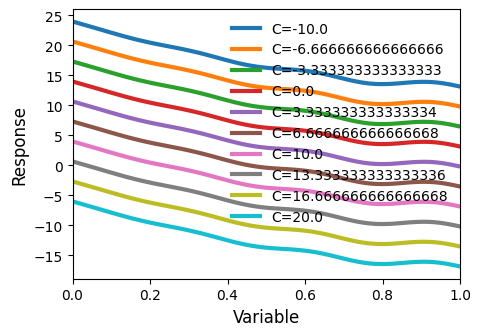

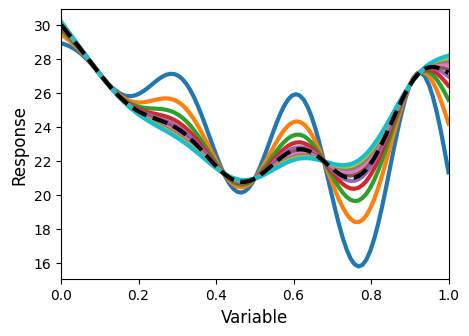

In [441]:
import numpy as np
import matplotlib.pyplot as plt

# Define High-Fidelity model: Represents a complex real-world phenomenon with multiple terms.
def func_HF(x):
    return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2

# Define Low-Fidelity model: A simplified model accounting for the main terms in the High-Fidelity model.
# A and B are constants, and C is a tunable parameter.
def func_LF(x, C):
    A = 0.7
    B = 10
    return A * func_HF(x) + B * (x - 0.5) + C

# Design matrix construction: Creates a matrix comprising features from the Low-Fidelity model, x, and x^2.
def func_X(x, A):
    return np.array([func_LF(x, A), x, x ** 2]).T

# Weighted Least Squares Coefficients: Computes the coefficients for a linear model using the weighted least squares method.
def func_coef(X, Y, W=np.diag(np.ones(len(X)))):
    return np.linalg.inv(X.T.dot(W).dot(X)).dot(X.T).dot(W).dot(Y)

# Comprehensive Model: A model constructed using both High-Fidelity and Low-Fidelity information.
def func_comprehensive(x, x_sampHF, A):
    X = func_X(x, A)
    Y = func_HF(x_sampHF)
    B = func_coef(func_X(x_sampHF, A), Y)
    return ((B[0]) * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

# Sample points to tune the comprehensive model based on High-Fidelity information.
x_sampHF = np.array([0.1, 0.5, 0.9])

# First Figure: Plots differences between High-Fidelity and Low-Fidelity models for different values of C.
plt.figure(figsize=[5, 3.5])
for A in np.linspace(-10, 20, 10):
    plt.plot(x, func_HF(x) - func_LF(x, A), linewidth=3, label=f'C={A}')
plt.xlim([0, 1])
plt.legend(frameon=False)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)

# Second Figure: Plots the Comprehensive Model for various values of C, and compares it with the High-Fidelity model.
plt.figure(figsize=[5, 3.5])
for A in np.linspace(-10, 20, 10):
    plt.plot(x, func_comprehensive(x, x_sampHF, A), linewidth=3, label=f'C={A}')
plt.plot(x, func_HF(x), 'k--', linewidth=3, label='HF')
plt.xlim([0, 1])
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)
plt.savefig('C.png', dpi=1000, bbox_inches='tight', transparent=True)


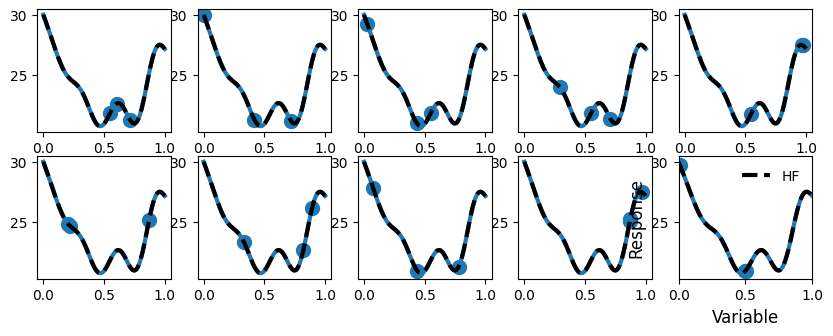

In [442]:
'''High-Fidelity Model (func_HF): Represents a complex underlying system.
    Low-Fidelity Model (func_LF): Simpler surrogate model with coefficients AA, BB, and CC.
    Design Matrix (func_X): Composes the design matrix incorporating LF, xx, and x2x2.
    Weighted Least Squares Coefficients (func_coef): Uses WLS to estimate the model coefficients based on design matrix and output values.
    Comprehensive Model (func_comprehensive): Constructs a composite model based on LF and HF information.
    Plotting Routine: Visualizes how the comprehensive model performs against random HF samples over multiple subplots.
'''

# High-Fidelity (HF) Model Definition
def func_HF(x):
    return 2 * x * np.sin(20 * x + 2) + 10 * np.exp(x) + 20 * (x - 1) ** 2

# Low-Fidelity (LF) Model Definition
def func_LF(x):
    A, B, C = 0.7, 10, 5  # Define model parameters
    return A * func_HF(x) + B * (x - 0.5) + C

# Design Matrix Formation
def func_X(x, A):
    return np.array([func_LF(x), x, x ** 2]).T

# Coefficient Estimation Using Weighted Least Squares (WLS)
def func_coef(X, Y, W=np.diag(np.ones(len(X)))):
    return np.linalg.inv(X.T @ W @ X) @ X.T @ W @ Y

# Comprehensive Model Leveraging LF and HF Information
def func_comprehensive(x, x_sampHF):
    X = func_X(x, A)
    Y = func_HF(x_sampHF)  # Extract HF values based on sampling
    B = func_coef(func_X(x_sampHF, A), Y)  # Calculate model coefficients
    return (B[0] * X[:, 0] + X[:, 1:].dot(B[1:].reshape(-1, 1)).T)[0]

# Define Evaluation Points
x = np.linspace(0, 1, 100)  # Continuous range

# Plotting Routine
plt.figure(figsize=[10, 3.5])

# Perform multiple subplots to compare different sample points
for i in range(10):
    plt.subplot(2, 5, i + 1)
    np.random.seed(i)
    x_sampHF = np.random.rand(3)  # Random sampling for HF
    plt.scatter(x_sampHF, func_HF(x_sampHF), 100)  # Plot sampled HF points
    
    # Plot the Comprehensive and HF Models
    plt.plot(x, func_comprehensive(x, x_sampHF), linewidth=3)
    plt.plot(x, func_HF(x), 'k--', linewidth=3, label='HF')

# Common plot parameters
plt.xlim([0, 1])
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Response', fontsize=12)
plt.legend(frameon=False)
